# Test: analysis via zoom into protostars and cutouts of the HC3N cube

The idea is to see if there are regions with possible streamers

In [1]:
import numpy as np
import os
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import SkyCoord, FK5
from astropy.nddata.utils import Cutout2D
from spectral_cube import SpectralCube
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
%matplotlib widget

sourcecat = '../../data/my_catalog_vel.csv'
cubefile = '../../data/NGC1333_HC3N_L24-merged_small_K.fits'
mlex1file = '../../bayes_frame/nested-sampling/HC3N/NGC1333-SE-mle-x1_filtered_QA.fits'
mlex2file = '../../bayes_frame/nested-sampling/HC3N/NGC1333-SE-mle-x2_filtered_QA.fits'
mlex3file = '../../bayes_frame/nested-sampling/HC3N/NGC1333-SE-mle-x3_filtered_QA.fits'
#I think in some cases we also need the clusters
cut_clusters = True
clusters_HC3N_files = sorted(glob('../../clustering/cluster*[0-9]_HDBSCAN_HC3N.fits'))


radiuscut_au = 10000
distance = 298 # pc
radiuscut = radiuscut_au / distance *u.arcsec # 

In [2]:
clusters_HC3N_files

['../../clustering/cluster0_HDBSCAN_HC3N.fits',
 '../../clustering/cluster1_HDBSCAN_HC3N.fits',
 '../../clustering/cluster2_HDBSCAN_HC3N.fits',
 '../../clustering/cluster3_HDBSCAN_HC3N.fits',
 '../../clustering/cluster4_HDBSCAN_HC3N.fits',
 '../../clustering/cluster5_HDBSCAN_HC3N.fits',
 '../../clustering/cluster6_HDBSCAN_HC3N.fits',
 '../../clustering/cluster7_HDBSCAN_HC3N.fits']

In [3]:
cube = SpectralCube.read(cubefile)
wcsskycube = WCS(cube.header).celestial

mlex1, mlex1head = fits.getdata(mlex1file, header=True)
mlex2, mlex2head = fits.getdata(mlex2file, header=True)
mlex3, mlex3head = fits.getdata(mlex3file, header=True)

if cut_clusters:
    cluster_HC3N_master = [fits.getdata(filein) for filein in clusters_HC3N_files]
    cluster_head = fits.getheader(clusters_HC3N_files[0])

catalog_protostars = pd.read_csv(sourcecat)


In [3]:
catalog_protostars

,Source,RAJ2000,DEJ2000,Other,Mult,Class,Lbol,e_Lbol,Tbol,e_Tbol,SimbadName,vlsr,e_vlsr,ref_vlsr
0,Per-emb-3,52.252396,31.200057,---,N,0,0.50,0.06,32.0,2.0,[EES2009] Per-emb 3,7.30,0.01000,Stephens+19
1,IRAS4A,52.293904,31.225259,NGC 1333 IRAS4A,Y,0,7.00,0.70,29.0,2.0,[EES2009] Per-emb 12,6.90,0.00500,Stephens+19
2,IRAS4B,52.300067,31.218898,NGC 1333 IRAS4B,Y,0,4.00,0.30,28.0,1.0,[EES2009] Per-emb 13,7.10,0.00900,Stephens+19
3,Per-emb-14,52.306450,31.232819,NGC 1333 IRAS4C,N,0,0.70,0.08,31.0,2.0,[EES2009] Per-emb 14,7.90,0.03000,Stephens+19
4,Per-emb-15,52.266896,31.246177,"RNO15-FIR, SK 14",N,0,0.40,0.10,36.0,4.0,[EES2009] Per-emb 15,6.80,0.01000,Stephens+19
5,Per-emb-27,52.231538,31.243618,NGC 1333 IRAS2A,Y,0/I,19.00,0.40,69.0,1.0,[EES2009] Per-emb 27,8.10,0.02000,Stephens+19
6,Per-emb-36,52.239058,31.237714,NGC 1333 IRAS2B,Y,I,5.30,1.00,106.0,12.0,[EES2009] Per-emb 36,6.90,0.02000,Stephens+19
7,Per-emb-44,52.265683,31.267724,SVS13A,Y,0/I,32.50,7.10,188.0,9.0,[EES2009] Per-emb 44,8.70,0.02000,Stephens+19
8,Per-bolo-45,52.282083,31.288000,Per-Bolo-45,N,0,0.05,0.05,15.0,NaN,[EYG2006] Bolo 45,NaN,NaN,NaN
9,SVS13C,52.258208,31.260570,SVS13C,Y,0,1.50,0.20,21.0,1.0,[SVS76] NGC 1333 13C,8.90,0.02000,Stephens+19


In [40]:
# sk15 is the 15 source, not intentionally
# Per-emb-15 is source 4
# SVS 13A is source 7
# IRAS4b is source 2
sourcename = 'SVS13A'
racent, deccent = catalog_protostars.loc[7, ['RAJ2000', 'DEJ2000']].values
subcubes_basename = sourcename + '_HC3N_{}'
vlsr = catalog_protostars.loc[7, 'vlsr']

In [41]:
# here we cut the images
centerx, centery = wcsskycube.all_world2pix([racent], [deccent], 0)
centerx, centery = int(centerx[0]), int(centery[0])

radiuspix = int(np.round(radiuscut.to(u.deg).value / np.abs(cube.header['CDELT2']), 0))

In [42]:
centerx, centery

(338, 435)

In [43]:
if not os.path.exists(subcubes_basename.format('cube.fits')):
    subcube = cube[:, centery-radiuspix:centery+radiuspix, centerx-radiuspix:centerx+radiuspix]
    subcube.write(subcubes_basename.format('cube.fits'))
else:
    subcube = SpectralCube.read(subcubes_basename.format('cube.fits'))
headersmall = subcube.header
headersmall_mle = WCS(headersmall).celestial.to_header()
headersmall_mle['NAXIS'] = 3
headersmall_mle['BUNIT'] = 'km s-1'
headersmall_mle['BMAJ'] = headersmall['BMAJ']
headersmall_mle['BMIN'] = headersmall['BMIN']
headersmall_mle['BPA'] = headersmall['BPA']
headersmall_mle['RESTFREQ'] = headersmall['RESTFREQ']

In [44]:

if not os.path.exists(subcubes_basename.format('mlex1.fits')):
    submlex1 = mlex1[:, centery-radiuspix:centery+radiuspix, centerx-radiuspix:centerx+radiuspix]
    headersmall_mle['NAXIS3'] = 6
    fits.writeto(subcubes_basename.format('mlex1.fits'), submlex1, headersmall_mle)
else:
    submlex1, headersmall_mle = fits.getdata(subcubes_basename.format('mlex1.fits'), header=True)

if not os.path.exists(subcubes_basename.format('mlex2.fits')):
    submlex2 = mlex2[:, centery-radiuspix:centery+radiuspix, centerx-radiuspix:centerx+radiuspix]
    headersmall_mle['NAXIS3'] = 12
    fits.writeto(subcubes_basename.format('mlex2.fits'), submlex2, headersmall_mle)
else:
    submlex2, headersmall_mle = fits.getdata(subcubes_basename.format('mlex2.fits'), header=True) 

if not os.path.exists(subcubes_basename.format('mlex3.fits')):
    submlex3 = mlex3[:, centery-radiuspix:centery+radiuspix, centerx-radiuspix:centerx+radiuspix]
    headersmall_mle['NAXIS3'] = 18
    fits.writeto(subcubes_basename.format('mlex3.fits'), submlex3, headersmall_mle)
else:
    submlex3, headersmall_mle = fits.getdata(subcubes_basename.format('mlex3.fits'), header=True) 



In [45]:
if cut_clusters:
    subclusters_master = []
    for i, cluster in enumerate(cluster_HC3N_master):
        if not os.path.exists(subcubes_basename.format('cluster{}.fits'.format(i))):
            subcluster = cluster[:, centery-radiuspix:centery+radiuspix, centerx-radiuspix:centerx+radiuspix]
            if np.isnan(subcluster).all(): continue
            else:
                subclusters_master.append(subcluster)
                headersmall_mle['NAXIS3'] = 6
                fits.writeto(subcubes_basename.format('cluster{}.fits'.format(i)), subcluster, headersmall_mle)
        else:
            subclusters_master.append(fits.getdata(subcubes_basename.format('cluster{}.fits'.format(i))))

### Exploration plots

In [52]:
vlsr

8.7

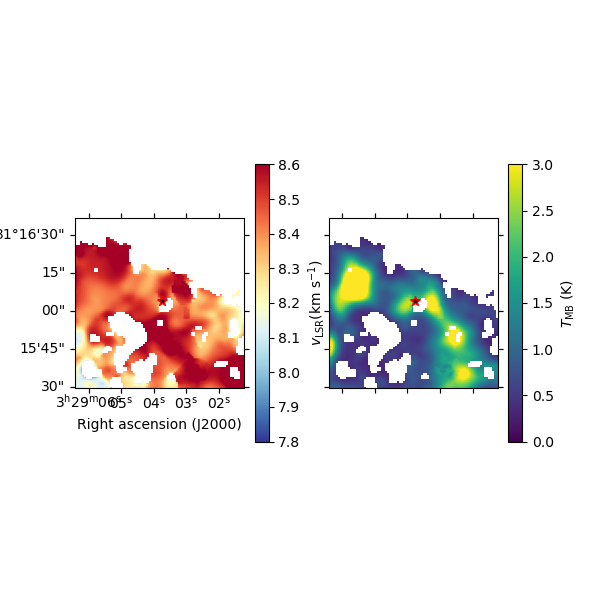

In [53]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(subclusters_master[0][1], cmap='RdYlBu_r', vmin=7.8, vmax=8.6)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
sc2 = ax2.imshow(subclusters_master[0][0], cmap='viridis', vmin=0, vmax=3)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$T_{\mathrm{MB}}$ (K)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

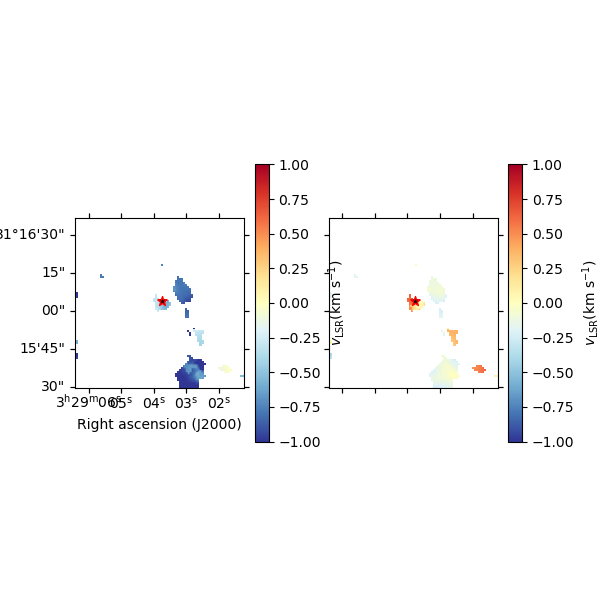

In [49]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex2[1]-vlsr, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
sc2 = ax2.imshow(submlex2[4]-vlsr, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

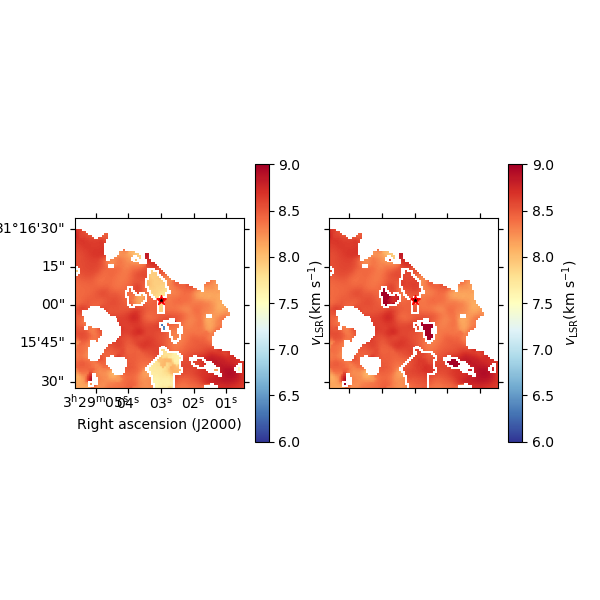

In [42]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})


sc1 = ax1.imshow(submlex2[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax1.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
sc2 = ax2.imshow(submlex2[4], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

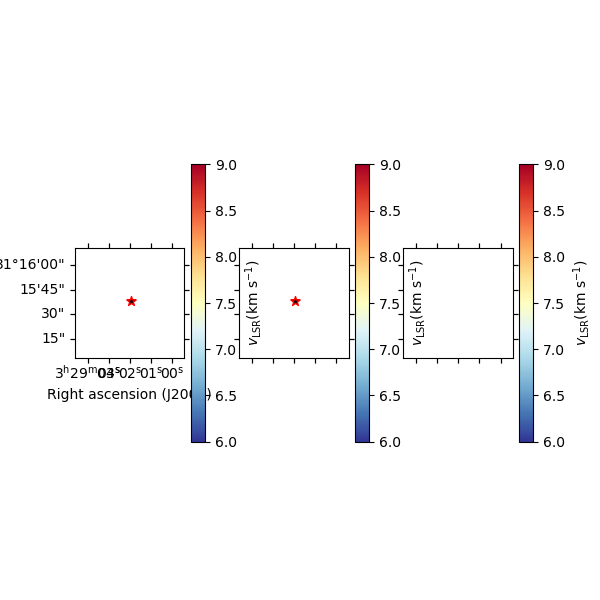

In [57]:
# in case there are 3 components
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex3[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
sc2 = ax2.imshow(submlex3[4], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
sc3 = ax3.imshow(submlex3[7], cmap='RdYlBu_r', vmin=6, vmax=9)
ax3.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc3, ax=ax3, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax3.coords[0]
lat = ax3.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

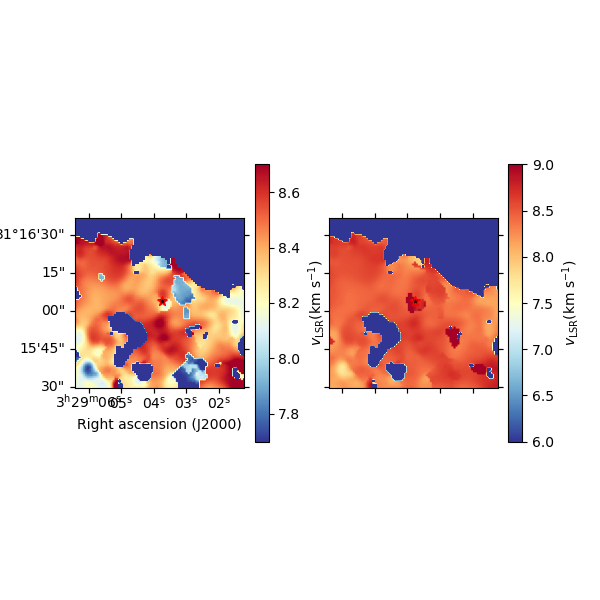

In [55]:
# we just make plots when we need them at this point
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})
image = np.nansum([submlex2[1], submlex1[1]], axis=0)
image2 = np.nansum([submlex2[4], submlex1[1]], axis=0)

sc1 = ax1.imshow(image, cmap='RdYlBu_r', vmin=7.7, vmax=8.7)
# ax1.imshow(submlex3[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
sc2 = ax2.imshow(image2, cmap='RdYlBu_r', vmin=6, vmax=9)
# ax2.imshow(submlex3[4], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

## Analysis of KDE

- **SK 15: It seems that the more blueshifted component is not associated with the larger cloud**
- **Per-emb-15: there is an interesting elongation toward the SE of the protostar that has a different velocity than the rest of the filament. However, it is in line with the outflow direction. Nevertheless, the velocity gradient seems opposite to the outflow direction**
- Nothing obvious for IRAS4B nor 4B2 nor 4C
- **In IRAS 4A, at the north, where there should be a redshift according to the outflow direction, there seems to be a sudden blueshift from northwest to east of the protostar (very close to it), more obvious in cluster 7 of HC3N**
- **In IRAS2B, toward the south could be something interesting, we need a region to capture it**
- **In SVS13C, there seems to be an accelerating leg toward the west but it is smaller than the beam. Also, there seems to be a dip in velocities coming from the left and right in HC3N, when looking at cluster 3**
- Nothing obvious in SVS13A or B
- **In VLA3A (north of SVS13B and A) there might be something, if we assume the velocity of the star is the velocity of N2Hp at that positon = 8.44 km/s**
- **In ASR 54, there might be something toward the south if we assume a velocity of 7.08 km/s as in N2Hp**


In [141]:
if sourcename == 'SVS13C':
    if not os.path.exists(subcubes_basename.format('mlex1_mlex2_2.fits')):
        submlexcombined = np.nansum([submlex1, np.concatenate([submlex2[3:6, :, :], submlex2[9:12, :, :]])], axis=0)
        for i in range(6):
            submlexcombined[i][np.where(submlexcombined[i] < 1e-3)] = np.nan
        headersmall_mle['NAXIS3'] = 6
        fits.writeto(subcubes_basename.format('mlex1_mlex2_2.fits'), submlexcombined, headersmall_mle)
    else:
        submlexcombined, headersmall_mle = fits.getdata(subcubes_basename.format('mlex1_mlex2_2.fits'), header=True)

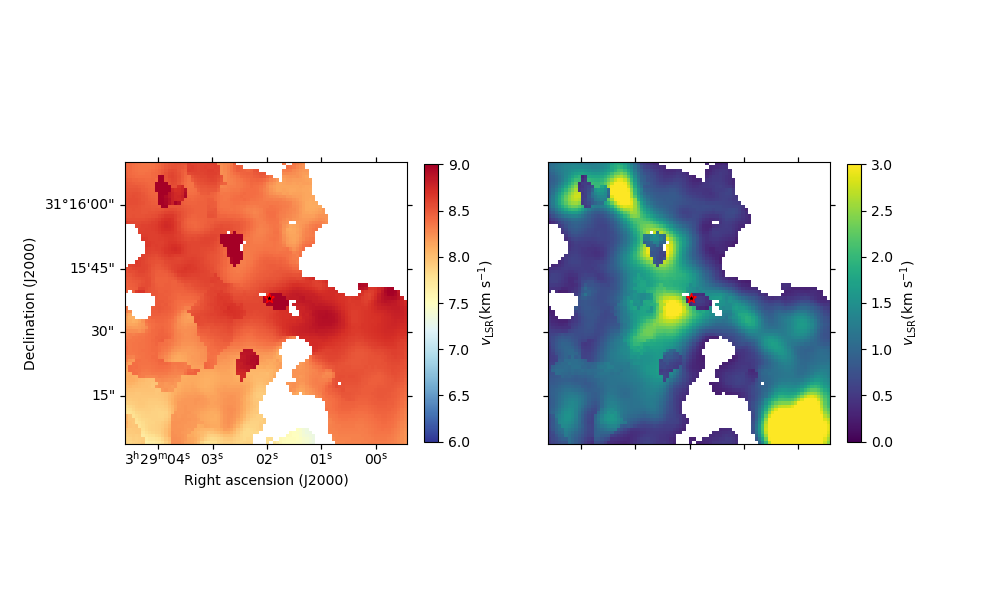

In [142]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(10,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlexcombined[1], cmap='RdYlBu_r', vmin=6, vmax=9)
# ax1.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=9)
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')

sc2 = ax2.imshow(submlexcombined[0], cmap='viridis', vmin=0, vmax=3) #vmin=6, vmax=9)
# ax2.imshow(submlex1[1], cmap='RdYlBu_r', 
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.6)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

We need to see how is its tendency with respect to the protostar's vlsr

The sampled zone depends on the source:
- For SK15, we use [1, radiuspix:int(radiuspix+radiuspix/2), int(radiuspix-radiuspix/2):int(radiuspix+radiuspix/2)]
- For Per-emb-15, we will use a region: we have two candidates, we need to decide which is best
- For IRAS 4A, we select a region
- For IRAS 2B, we have a region
- For SVS13C, we first save the components and then we see the region
- For VLA3 we have a region candidate
- For ASR 54 we have a region

In [143]:
from scipy.stats import gaussian_kde
from regions import Regions

def distance_au(x, y, xcent, ycent, header, distance_source=298):
    dist = np.hypot(np.abs(x-xcent), np.abs(y-ycent))
    return (dist*header['CDELT2'] * u.deg).to(u.arcsec).value * distance_source

In [144]:
# when just using a selection
# velsample = submlex2[1, radiuspix:int(radiuspix+radiuspix/2), int(radiuspix-radiuspix/2):int(radiuspix+radiuspix/2)]
# centerxsmall, centerysmall = int(radiuspix), int(radiuspix)
# xlen, ylen = np.shape(submlex1[1])
# XX, YY = np.meshgrid(np.linspace(0, xlen-1, xlen), np.linspace(0, ylen-1, ylen))
# distance_subcube = distance_au(XX, YY, centerxsmall, centerysmall, headersmall, distance_source=298)[radiuspix:int(radiuspix+radiuspix/2), int(radiuspix-radiuspix/2):int(radiuspix+radiuspix/2)]

# when using a region
region_file = 'candidate_region_{}.reg'.format(sourcename)
reg_load = Regions.read(region_file, format='ds9')[0]
wcssky_small = WCS(headersmall).celestial
reg_load_pix = reg_load.to_pixel(wcssky_small)
ylen, xlen = np.shape(submlex2[1])
centerxsmall, centerysmall = wcssky_small.all_world2pix([racent], [deccent], 0)
centerxsmall, centerysmall = int(centerxsmall), int(centerysmall)
XX, YY = np.meshgrid(np.linspace(0, xlen-1, xlen), np.linspace(0, ylen-1, ylen))
distance_subcube = distance_au(XX, YY, centerxsmall, centerysmall, headersmall, distance_source=298)
reg_load_pix.visual['edgecolor'] = 'black'

mask = reg_load_pix.to_mask()
cut_vel = mask.cutout(submlex2[1])
distance_subcube_cut = mask.cutout(distance_subcube)
gd = (mask.data == 1)
velsample = cut_vel[gd]
distance_sample = distance_subcube_cut[gd]


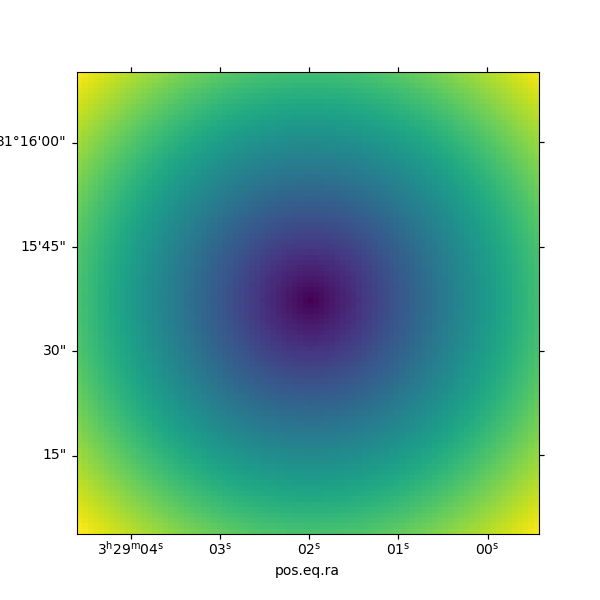

In [145]:
fig, ax1 = plt.subplots(1, 1 ,figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})
ax1.imshow(distance_subcube)

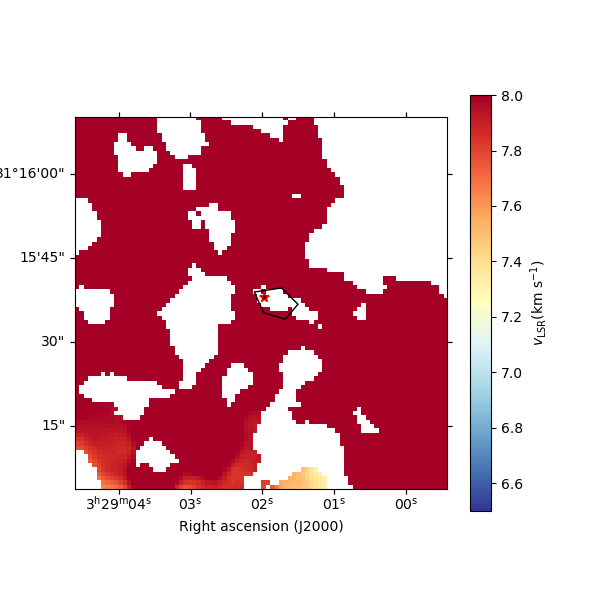

In [146]:
fig, ax1 = plt.subplots(1, 1 ,figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6.5, vmax=8)
# ax1.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=8)
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
reg_load_pix.plot(ax=ax1)

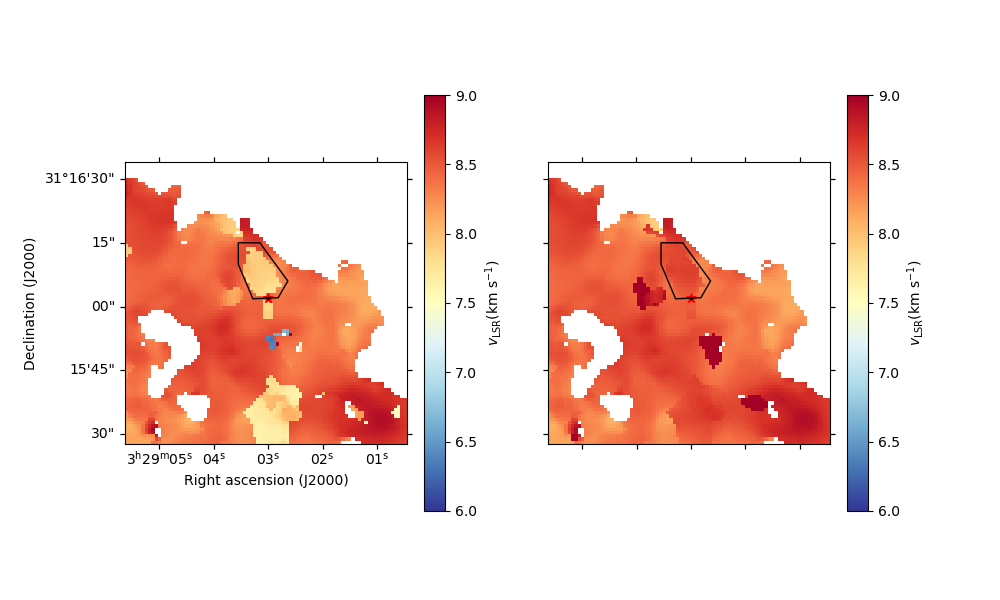

In [47]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(10,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex2[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax1.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=9)
fig.colorbar(sc1, ax=ax1, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')

sc2 = ax2.imshow(submlex2[4], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.imshow(submlex1[1], cmap='RdYlBu_r', vmin=6, vmax=9)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.9)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
reg_load_pix.plot(ax=ax1)
reg_load_pix.plot(ax=ax2)

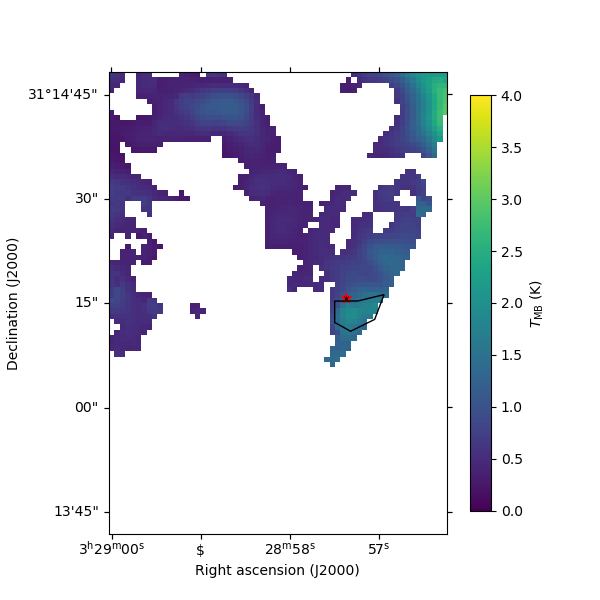

In [101]:
fig, ax1 = plt.subplots(1,1,figsize=(6,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex1[0], cmap='viridis', vmin=0, vmax=4)
# ax1.imshow(submlex1[0], cmap='viridis', vmin=0, vmax=2)
fig.colorbar(sc1, ax=ax1, label=r'$T_{\mathrm{MB}}$ (K)', shrink=0.9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')
reg_load_pix.plot(ax=ax1)

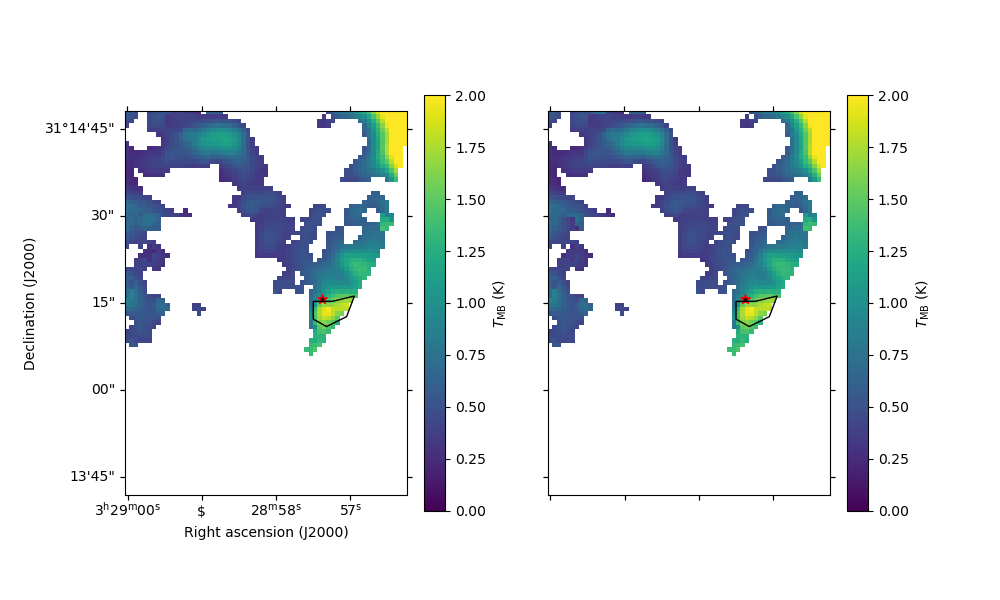

In [115]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(10,6), subplot_kw={'projection': WCS(headersmall).celestial})

sc1 = ax1.imshow(submlex2[0], cmap='viridis', vmin=0, vmax=2)
ax1.imshow(submlex1[0], cmap='viridis', vmin=0, vmax=2)
fig.colorbar(sc1, ax=ax1, label=r'$T_{\mathrm{MB}}$ (K)', shrink=0.9)
ax1.scatter(racent, deccent, transform=ax1.get_transform('world'), marker='*', s=50, fc='k', ec='r')
lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_axislabel('Right ascension (J2000)')
lat.set_axislabel('Declination (J2000)')

sc2 = ax2.imshow(submlex2[3], cmap='viridis', vmin=0, vmax=2)
ax2.imshow(submlex1[0], cmap='viridis', vmin=0, vmax=2)
ax2.scatter(racent, deccent, transform=ax2.get_transform('world'), marker='*', s=50, fc='k', ec='r')
fig.colorbar(sc2, ax=ax2, label=r'$T_{\mathrm{MB}}$ (K)', shrink=0.9)
lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
reg_load_pix.plot(ax=ax1)
reg_load_pix.plot(ax=ax2)

In [149]:
# here we build the space for the KDE to be plotted
xmin = 0
xmax = 2000
# y is velocity lsr
ymin = 8.4
ymax = 9

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

gd_vlos = np.isfinite(velsample*distance_sample)
values = np.vstack([distance_sample[gd_vlos], velsample[gd_vlos]])
# values = np.vstack([distance_sample, velsample])
kernel = gaussian_kde(values)
zz = np.reshape(kernel(positions).T, xx.shape)
zz /= zz.max() 

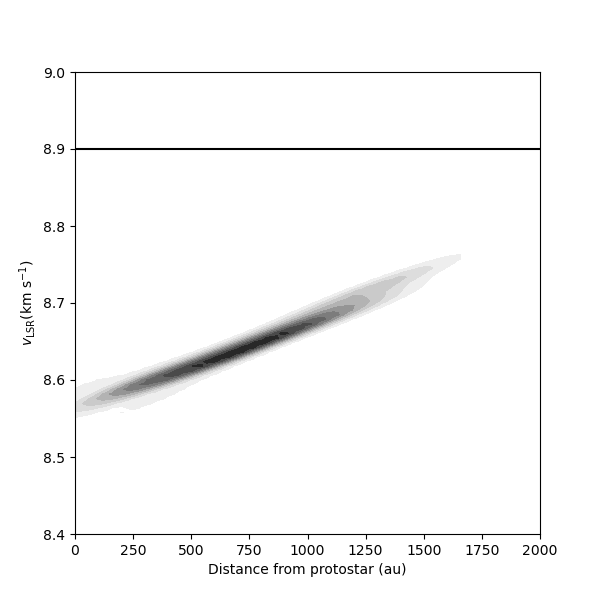

In [150]:
# fig, [ax, ax2] = plt.subplots(1, 2,figsize=(10,6))
# ax.contourf(xx, yy, zz, cmap='Greys', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
# ax.axhline(vlsr, color='k')
# ax.set_xlabel('Distance from protostar (au)')
# ax.set_ylabel(r'$v_{\mathrm{LSR}}$(km s$^{-1}$)')
# sc2 = ax2.imshow(velsample, vmin=6, vmax=9, cmap='RdYlBu_r', origin='lower')
# ax2.scatter(int(radiuspix/2), 0, marker='*', s=50)
# ax2.set_title('Sampled zone')
# fig.colorbar(sc2, ax=ax2, label=r'$v_{\mathrm{LSR}}$(km s$^{-1}$)', shrink=0.9, location='bottom')
fig, ax = plt.subplots(1, 1,figsize=(6,6))
ax.contourf(xx, yy, zz, cmap='Greys', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax.set_xlabel('Distance from protostar (au)')
ax.set_ylabel(r'$v_{\mathrm{LSR}}$(km s$^{-1}$)')
ax.axhline(vlsr, color='k')

## Streamline modelling for sources with enough information

In [130]:
import sys
sys.path.append('../../..')
import velocity_tools.velocity_tools.stream_lines as SL

In [ ]:
# source info for IRAS 4A
Mdisk = 
Menv = 
Mstar =  